# Load in data

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore", UserWarning)
import pandas as pd
import csv
import sys
import array
import xarray as xr
import cmocean.cm as cmocean
def write_with_byte_inversion(f, tab):
    tab2write = array.array('f', tab.T.flatten())
    if sys.byteorder == 'little':
        tab2write.byteswap()
    f.write(tab2write)

dtype=np.float32
#topo_adjust to topo wi
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import FuncFormatter
import pathlib
from pathlib import Path
import os
import netCDF4
from netCDF4 import Dataset as nc
import glob
from glob import glob
import glidertools as gt
import gsw

In [47]:
filenames = 'C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/sg675/p6750*.nc'


gt.load.seaglider_show_variables(filenames)

information is based on file: C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/sg675\p6750150.nc


In [48]:
names = [
    'ctd_depth',
    'ctd_time',
    'ctd_pressure',
    'aanderaa4831_dissolved_oxygen',
    'temperature',
    'salinity',
    'latitude',
    'longitude',
    'density_insitu',
    'absolute_salinity',
    'conservative_temperature',
    'dissolved_oxygen_sat',
    'eng_aa4831_O2',
    'density',
    'dissolved_oxygen_sat',
    'salinity_qc',
    'conductivity_raw',
    'temperature_raw',
    'eng_aa4831_Temp',
    'theta',
    'vert_speed',
    'conductivity',
]

In [49]:
# Remove duplicates by converting the list to a set and back to a list
names = list(names)

ds_dict = gt.load.seaglider_basestation_netCDFs(
    filenames, names,
    return_merged=False,
    keep_global_attrs=False
)


DIMENSION: sg_data_point
{salinity_qc, conductivity_raw, longitude, density, absolute_salinity, density_insitu, dissolved_oxygen_sat, latitude, conductivity, ctd_depth, eng_aa4831_Temp, temperature, vert_speed, conservative_temperature, ctd_time, ctd_pressure, aanderaa4831_dissolved_oxygen, temperature_raw, salinity, theta, eng_aa4831_O2}


100%|██████████| 296/296 [00:31<00:00,  9.25it/s]


In [96]:
depth = np.arange(0,1000,1)

In [97]:
ds_work = ds_dict['sg_data_point']

In [ ]:
ds_work.to_netcdf('ds_work.nc')

# skip above ones you have the dataset loaded

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore", UserWarning)
import pandas as pd
import csv
import sys
import array
import xarray as xr
import cmocean.cm as cmocean
def write_with_byte_inversion(f, tab):
    tab2write = array.array('f', tab.T.flatten())
    if sys.byteorder == 'little':
        tab2write.byteswap()
    f.write(tab2write)

dtype=np.float32
#topo_adjust to topo wi
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import FuncFormatter
import pathlib
from pathlib import Path
import os
import netCDF4
from netCDF4 import Dataset as nc
import glob
from glob import glob
import glidertools as gt
import gsw

In [99]:
ds_work = xr.open_dataset('ds_work.nc')

# NaN values for sat and optode temp

In [100]:
ds_work['aanderaa4831_dissolved_oxygen']  = ds_work.aanderaa4831_dissolved_oxygen.where(ds_work.eng_aa4831_Temp < 40)
ds_work['aanderaa4831_dissolved_oxygen']  = ds_work.aanderaa4831_dissolved_oxygen.where((ds_work.aanderaa4831_dissolved_oxygen / ds_work.dissolved_oxygen_sat) * 100 <110)

# Grid

In [55]:
# grid
depth = np.arange(0,1000,1)
latitude = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.latitude, bins=depth)
longitude = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.longitude, bins=depth)
ctd_pressure = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.ctd_pressure, bins=depth)
o2 = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.aanderaa4831_dissolved_oxygen, bins=depth)
salinity = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.absolute_salinity, bins=depth)
temp = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.conservative_temperature, bins=depth)
pottemp = temp = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.theta, bins=depth)
optodetemp = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.eng_aa4831_Temp, bins=depth)
vert_speed = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.vert_speed, bins= depth)
conductivity = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.conductivity, bins= depth)
density = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.density_insitu, bins = depth)


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


# some checks 

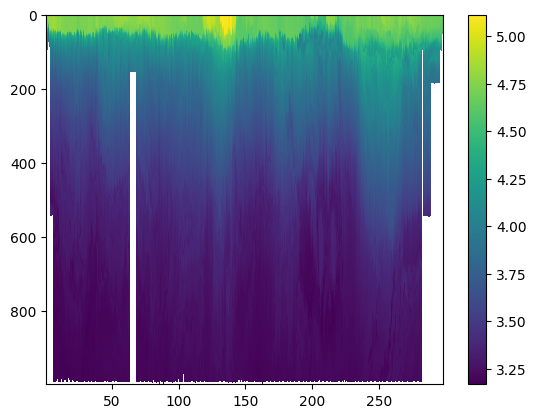

In [4]:
plt.pcolormesh(conductivity.dives, conductivity.ctd_depth, conductivity)
plt.colorbar()
plt.gca().invert_yaxis()

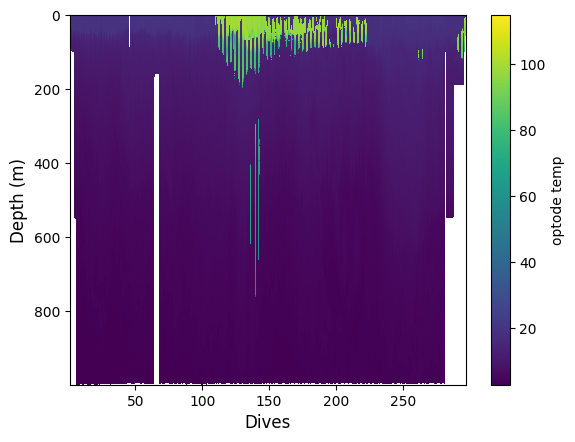

In [5]:
# pcolormesh graph
plt.pcolormesh(optodetemp.dives, optodetemp.ctd_depth, optodetemp)

# Add colorbar
plt.colorbar(label='optode temp')

# Add labels and title
plt.xlabel('Dives', fontsize=12)
plt.ylabel('Depth (m)', fontsize=12)

# Invert y-axis
plt.gca().invert_yaxis()

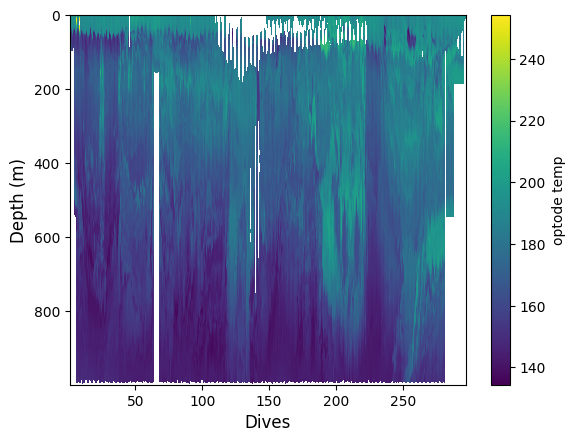

In [6]:
# pcolormesh graph
plt.pcolormesh(o2.dives, o2.ctd_depth, o2)

# Add colorbar
plt.colorbar(label='optode temp')

# Add labels and title
plt.xlabel('Dives', fontsize=12)
plt.ylabel('Depth (m)', fontsize=12)

# Invert y-axis
plt.gca().invert_yaxis()

In [7]:
ctd_depth = o2.ctd_depth
dives = o2.dives

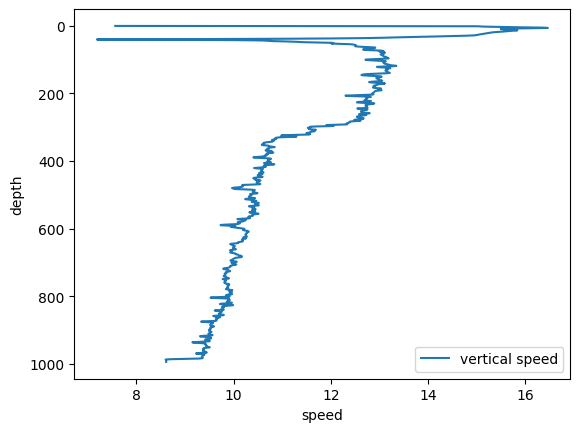

In [8]:
plt.plot(vert_speed.sel(dives=26.5), vert_speed.ctd_depth, label= 'vertical speed')

plt.gca().invert_yaxis()

plt.xlabel('speed')
plt.ylabel('depth')
plt.legend()

# horizontal cleaning


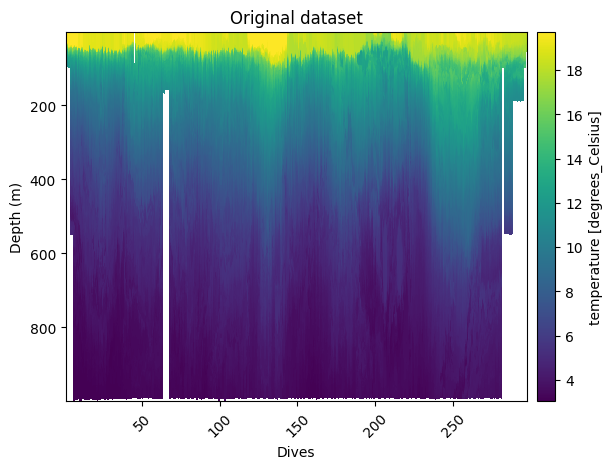

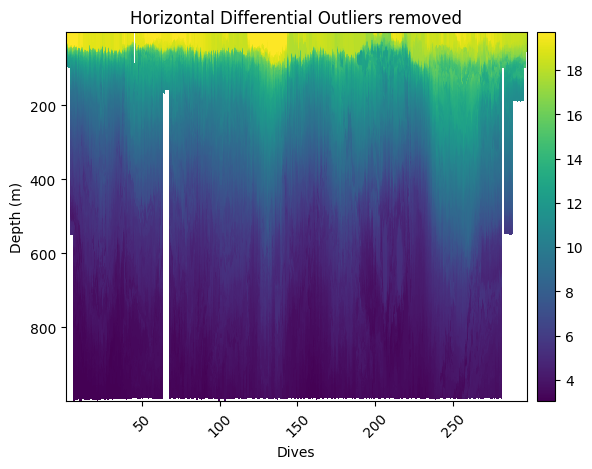

In [9]:
x = np.array(ds_work.dives)  # ensures these are arrays
y = np.array(ds_work.ctd_depth)


temp_horz = gt.cleaning.horizontal_diff_outliers(
    x, y, ds_work.temperature,
    multiplier=3,
    depth_threshold=0,
    mask_frac=0.2
)

gt.plot(x, y, ds_work.temperature)
plt.title('Original dataset')
#plt.xlim(220, 240)

plt.show()

gt.plot(x, y, temp_horz)
plt.title('Horizontal Differential Outliers removed')
#plt.xlim(220, 240)
plt.show()

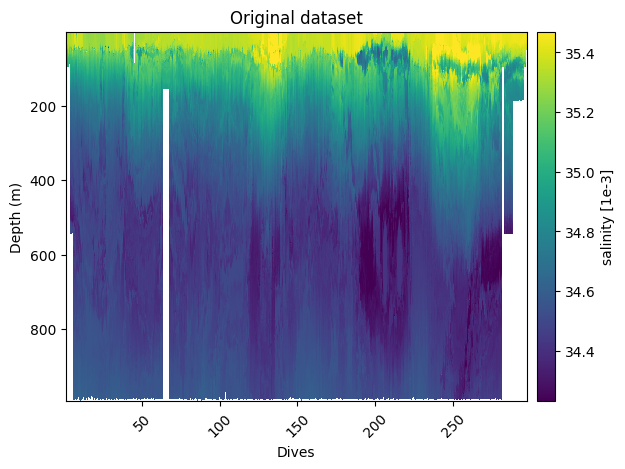

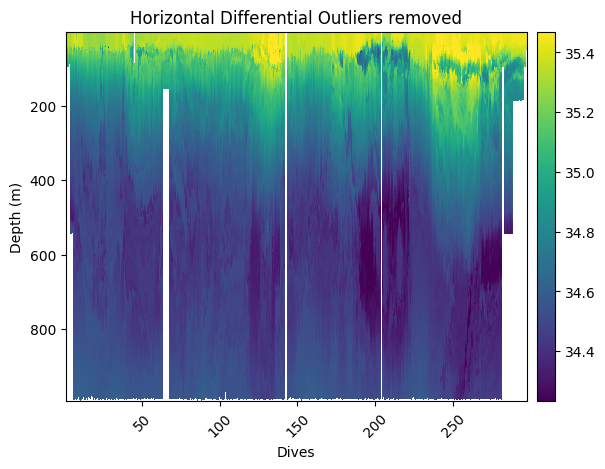

In [10]:
x = np.array(ds_work.dives)  # ensures these are arrays
y = np.array(ds_work.ctd_depth)


sal_horz = gt.cleaning.horizontal_diff_outliers(
    x, y, ds_work.salinity,
    multiplier=3,
    depth_threshold=0,
    mask_frac=0.1
)

gt.plot(x, y, ds_work.salinity)
plt.title('Original dataset')
#plt.xlim(200, 210)
plt.show()

gt.plot(x, y, sal_horz)
plt.title('Horizontal Differential Outliers removed')
#plt.xlim(200, 210)
plt.show()

# prove for saturation removal

In [11]:
saturation = (ds_work.aanderaa4831_dissolved_oxygen / ds_work.dissolved_oxygen_sat) * 100
saturation


<xarray.DataArray (sg_data_point: 1011760)>
array([nan, nan, nan, ..., nan, nan, nan])
Coordinates:
    ctd_time_dt64  (sg_data_point) datetime64[ns] 2023-03-22T08:33:43 ... 202...
    latitude       (sg_data_point) float64 -37.52 -37.52 ... -34.18 -34.18
    ctd_depth      (sg_data_point) float64 0.3871 0.8966 ... 0.01038 -0.1323
    longitude      (sg_data_point) float64 17.32 17.32 17.32 ... 16.82 16.82
Dimensions without coordinates: sg_data_point

<Axes: xlabel='Dives', ylabel='Depth (m)'>

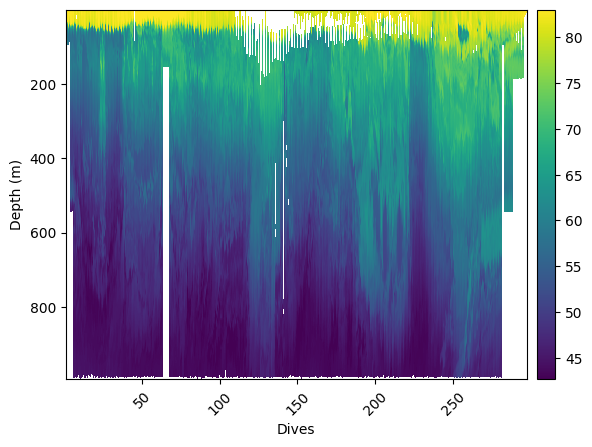

In [12]:
gt.plot(x,y, saturation)

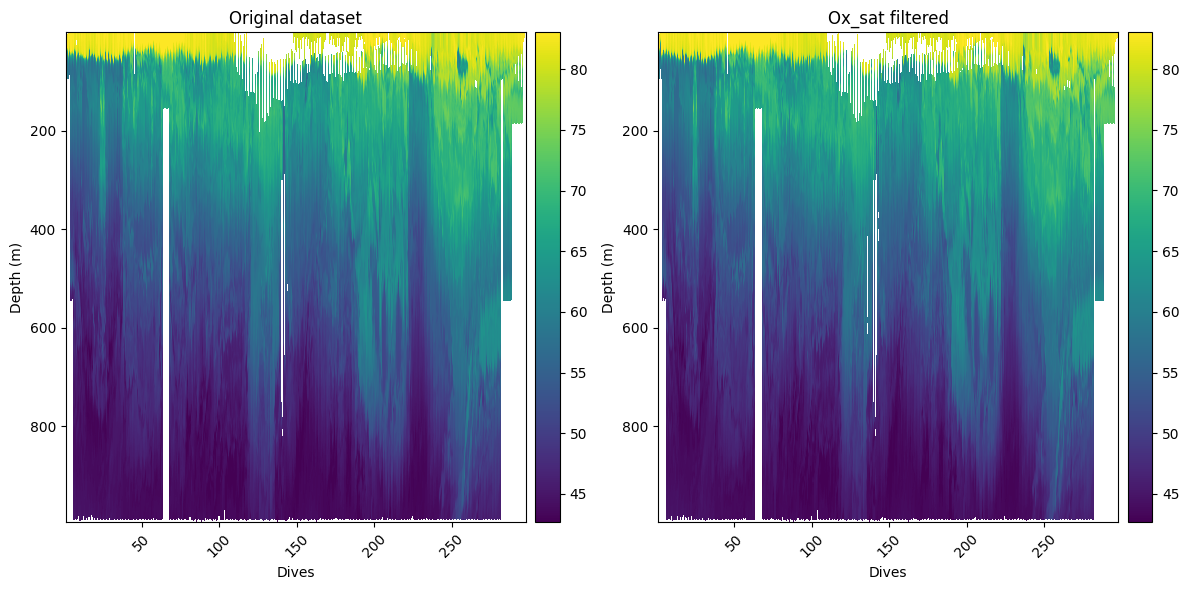

In [13]:
x = np.array(ds_work.dives)  # ensures these are arrays
y = np.array(ds_work.ctd_depth)

# Create a mask to filter out values outside the range 30 to 105
mask = (saturation >= 30) & (saturation <= 105)

# Apply mask to the dissolved oxygen data to show only the values within 30 to 105 and replace the mask with NaN values
o2_filtered_filtered = np.where(mask, saturation, np.nan)

# Check if o2_filtered_filtered contains any valid values
if np.isnan(o2_filtered_filtered).all():
    print("No valid values to plot.")
else:
    # Plot the dataset
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the original dataset
    gt.plot(x, y, saturation, ax=axs[0])
    axs[0].set_title('Original dataset')
    #axs[0].invert_yaxis()   # Invert y-axis
# Set y-axis limit to 0-50

    # Plot the filtered dataset with dissolved oxygen values between 30 and 105
    gt.plot(x, y, o2_filtered_filtered, ax=axs[1])
    axs[1].set_title('Ox_sat filtered')
    #axs[1].invert_yaxis()   # Invert y-axis
    
    
    plt.tight_layout()
    plt.show()

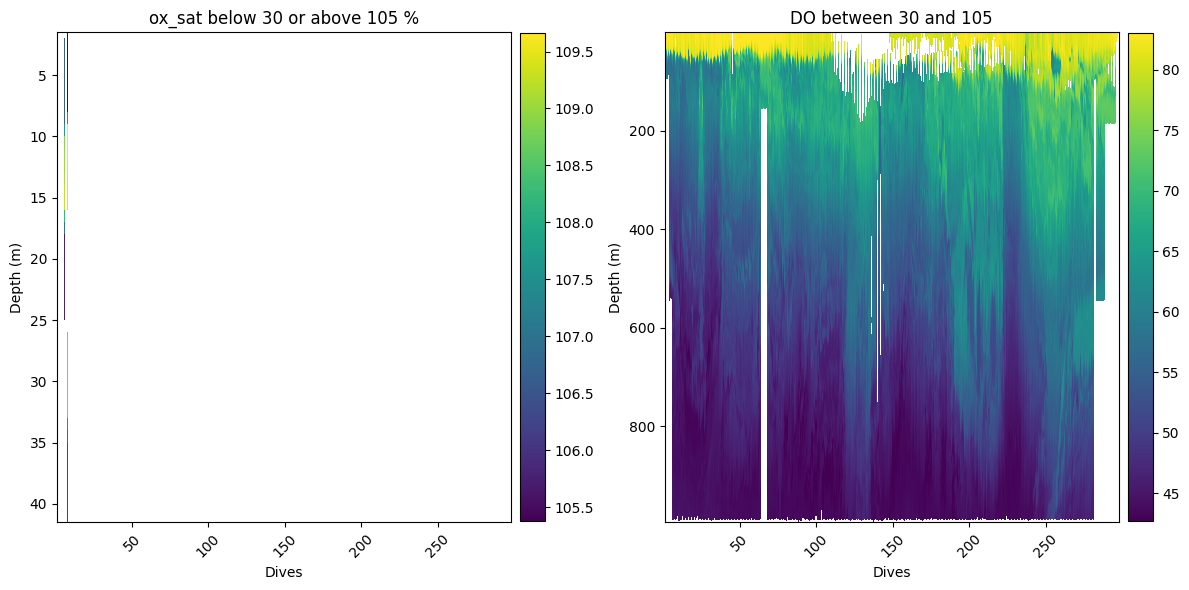

In [14]:
# Create masks to filter out values outside the range 30 to 105 and above 105 or below 30
mask_30_to_105 = (saturation >= 30) & (saturation <= 105)
mask_below_30_or_above_105 = ~mask_30_to_105

# Apply masks to the dissolved oxygen data to show only the values within 30 to 105 and outside that range
o2_below_30_or_above_105 = np.where(mask_below_30_or_above_105, saturation, np.nan)
o2_30_to_105 = np.where(mask_30_to_105, saturation, np.nan)

# Create the figure and axes objects
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot dissolved oxygen values below 30 or above 105
gt.plot(x, y, o2_below_30_or_above_105, ax=axs[0])
axs[0].set_title('ox_sat below 30 or above 105 %')
#axs[0].set_ylim(50, 0)  #Set y-axis limit to 0-50 and invert y-axis


# Plot dissolved oxygen values between 30 and 105
gt.plot(x, y, o2_30_to_105, ax=axs[1])
axs[1].set_title('DO between 30 and 105')
#axs[1].set_ylim(100, 0)  # Set y-axis limit to 0-50 and invert y-axis


plt.tight_layout()
plt.show()

In [15]:
ds_work = ds_work.where((ds_work.aanderaa4831_dissolved_oxygen / ds_work.dissolved_oxygen_sat) * 100 <105)

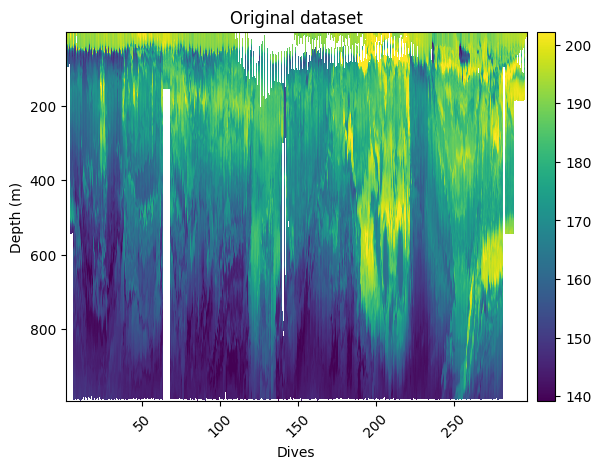

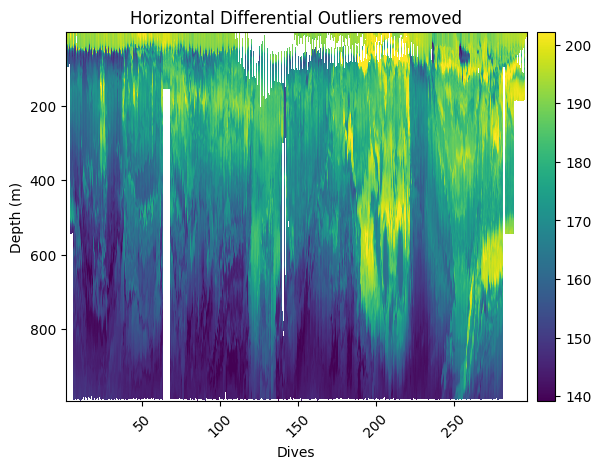

In [16]:
x = np.array(ds_work.dives)  # ensures these are arrays
y = np.array(ds_work.ctd_depth)


ox_horz = gt.cleaning.horizontal_diff_outliers(
    x, y, ds_work.aanderaa4831_dissolved_oxygen,
    multiplier=3,
    depth_threshold=0,
    mask_frac=0.2
)

gt.plot(x, y, ds_work.aanderaa4831_dissolved_oxygen)
plt.title('Original dataset')
#plt.xlim(220, 240)

plt.show()

gt.plot(x, y, ox_horz)
plt.title('Horizontal Differential Outliers removed')
#plt.xlim(220, 240)
plt.show()

# standard cleaning tool Temp

In [ ]:
x = np.array(ds_work.dives)  # ensures these are arrays
y = np.array(ds_work.ctd_depth)

ox_clean_s = gt.calc_physics(ds_work.conservative_temperature, x, y)
                       


# PLOTTING
fig, ax = plt.subplots(3, 1, figsize=[9, 8.5], sharex=True, dpi=90)
cmap = plt.get_cmap("RdBu_r")
gt.plot(x, y, ds_work.conservative_temperature, ax=ax[0])
gt.plot(x, y, ox_clean_s, ax=ax[1])
gt.plot(x, y, ox_clean_s - ds_work.conservative_temperature, cmap=cmap, vmin = -0.4, vmax = 0.4, ax=ax[2])

[a.set_xlabel('') for a in ax]

ax[0].cb.set_label('Original Data')
ax[1].cb.set_label('Cleaned Data')
ax[2].cb.set_label('Difference from Original')

plt.show()

# Absolute Salinity standard cleaning

In [ ]:
x = np.array(ds_work.dives)  # ensures these are arrays
y = np.array(ds_work.ctd_depth)

sal_clean_s = gt.calc_physics(ds_work.absolute_salinity, x, y)
                       


# PLOTTING
fig, ax = plt.subplots(3, 1, figsize=[9, 8.5], sharex=True, dpi=90)
cmap = plt.get_cmap("RdBu_r")
gt.plot(x, y, ds_work.absolute_salinity, ax=ax[0])
gt.plot(x, y, sal_clean_s, ax=ax[1])
gt.plot(x, y, sal_clean_s - ds_work.absolute_salinity, cmap=cmap, vmin=-0.1, vmax = 0.1, ax=ax[2])

[a.set_xlabel('') for a in ax]

ax[0].cb.set_label('Original Data')
ax[1].cb.set_label('Cleaned Data')
ax[2].cb.set_label('Difference from Original')

plt.show()

# standard cleaning oxygen

In [ ]:
x = np.array(ds_work.dives)  # ensures these are arrays
y = np.array(ds_work.ctd_depth)

ox_clean_s = gt.calc_physics(ds_work.aanderaa4831_dissolved_oxygen, x, y)
                       


# PLOTTING
fig, ax = plt.subplots(3, 1, figsize=[9, 8.5], sharex=True, dpi=90)
cmap = plt.get_cmap("RdBu_r")
gt.plot(x, y, ds_work.aanderaa4831_dissolved_oxygen, ax=ax[0])
gt.plot(x, y, ox_clean_s, ax=ax[1])
gt.plot(x, y, ox_clean_s - ds_work.aanderaa4831_dissolved_oxygen, cmap=cmap, vmin = -0.45, vmax= 0.45 , ax=ax[2])

[a.set_xlabel('') for a in ax]

ax[0].cb.set_label('Original Data')
ax[1].cb.set_label('Cleaned Data')
ax[2].cb.set_label('Difference from Original')

plt.show()

# my filtering


Physics Variable:
	Removing outliers with IQR * 2.5: 0 obs
	Removing spikes with rolling median (spike window=5)
	Removing horizontal outliers (fraction=0.2, multiplier=2.5)
	Smoothing with Savitzky-Golay filter (window=11, order=2)


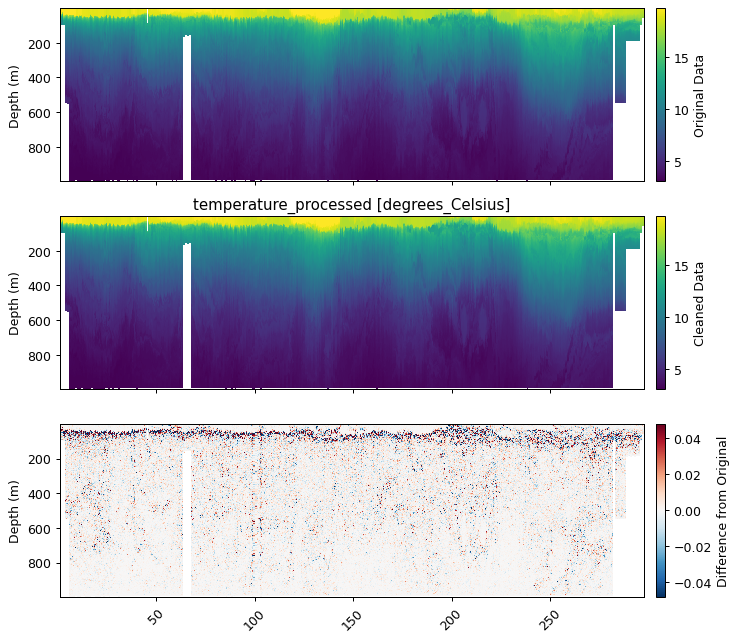

In [56]:
x = np.array(ds_work.dives)  # ensures these are arrays
y = np.array(ds_work.ctd_depth)

temp_i_f = gt.calc_physics(ds_work.temperature, x, y, iqr=2.5,
                            spike_window=5, spike_method='median',
                            mask_frac=0.2, 
                          savitzky_golay_window=11, savitzky_golay_order=2)
                       


# PLOTTING
fig, ax = plt.subplots(3, 1, figsize=[9, 8.5], sharex=True, dpi=90)
cmap = plt.get_cmap("RdBu_r")
gt.plot(x, y, ds_work.temperature, ax=ax[0])
gt.plot(x, y, temp_i_f, ax=ax[1])
gt.plot(x, y, temp_i_f - ds_work.temperature, cmap=cmap, ax=ax[2])

[a.set_xlabel('') for a in ax]

ax[0].cb.set_label('Original Data')
ax[1].cb.set_label('Cleaned Data')
ax[2].cb.set_label('Difference from Original')

plt.show()



Physics Variable:
	Removing outliers with IQR * 2.5: 0 obs
	Removing spikes with rolling median (spike window=5)
	Removing horizontal outliers (fraction=0.2, multiplier=2.5)
	Smoothing with Savitzky-Golay filter (window=11, order=2)


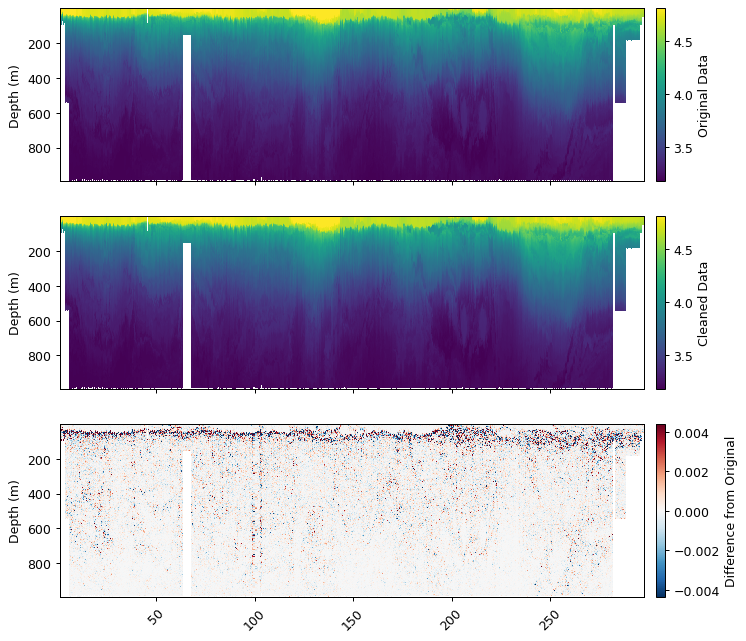

In [57]:
x = np.array(ds_work.dives)  # ensures these are arrays
y = np.array(ds_work.ctd_depth)

cond_f = gt.calc_physics(ds_work.conductivity, x, y, iqr=2.5,
                            spike_window=5, spike_method='median',
                            mask_frac=0.2, 
                          savitzky_golay_window=11, savitzky_golay_order=2)
                       


# PLOTTING
fig, ax = plt.subplots(3, 1, figsize=[9, 8.5], sharex=True, dpi=90)
cmap = plt.get_cmap("RdBu_r")
gt.plot(x, y, ds_work.conductivity, ax=ax[0])
gt.plot(x, y, cond_f, ax=ax[1])
gt.plot(x, y, cond_f - ds_work.conductivity, cmap=cmap, ax=ax[2])

[a.set_xlabel('') for a in ax]

ax[0].cb.set_label('Original Data')
ax[1].cb.set_label('Cleaned Data')
ax[2].cb.set_label('Difference from Original')

plt.show()



Physics Variable:
	Removing outliers with IQR * 2.5: 0 obs
	Removing spikes with rolling median (spike window=5)
	Removing horizontal outliers (fraction=0.2, multiplier=2.5)
	Smoothing with Savitzky-Golay filter (window=11, order=2)


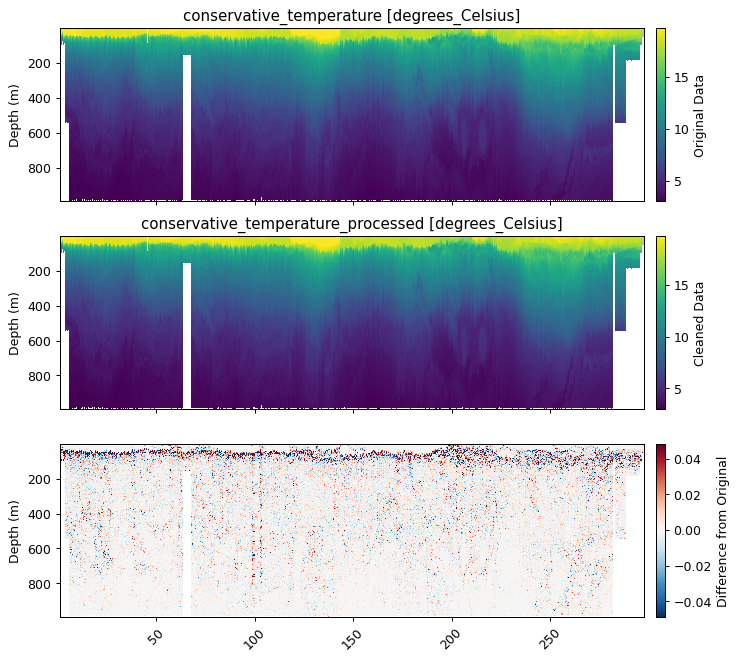

In [58]:
x = np.array(ds_work.dives)  # ensures these are arrays
y = np.array(ds_work.ctd_depth)

temp_f = gt.calc_physics(ds_work.conservative_temperature, x, y, iqr=2.5,
                            spike_window=5, spike_method='median',
                            mask_frac=0.2, 
                          savitzky_golay_window=11, savitzky_golay_order=2)
                       


# PLOTTING
fig, ax = plt.subplots(3, 1, figsize=[9, 8.5], sharex=True, dpi=90)
cmap = plt.get_cmap("RdBu_r")
gt.plot(x, y, ds_work.conservative_temperature, ax=ax[0])
gt.plot(x, y, temp_f, ax=ax[1])
gt.plot(x, y, temp_f - ds_work.conservative_temperature, cmap=cmap, ax=ax[2])

[a.set_xlabel('') for a in ax]

ax[0].cb.set_label('Original Data')
ax[1].cb.set_label('Cleaned Data')
ax[2].cb.set_label('Difference from Original')

plt.show()


In [59]:
temp_f_g = gt.grid_data(ds_work.dives, ds_work.ctd_depth, temp_f, bins=depth)

Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


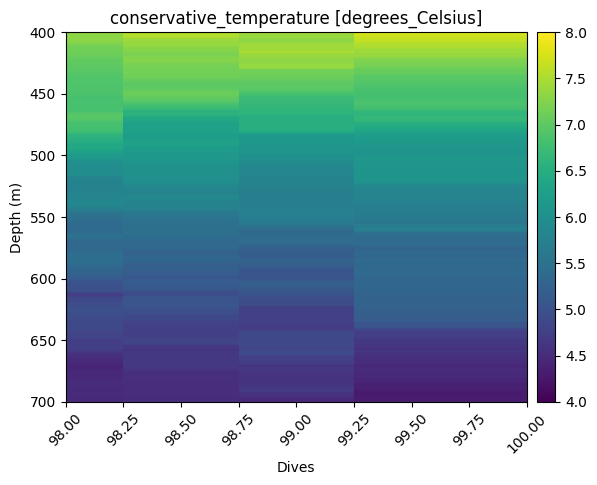

In [60]:
gt.plot(x, y, ds_work.conservative_temperature,vmin = 4, vmax = 8)
plt.xlim(98,100)
plt.ylim(400,700)
plt.gca().invert_yaxis()


Text(0.5, 1.0, 'difference with filter and data')

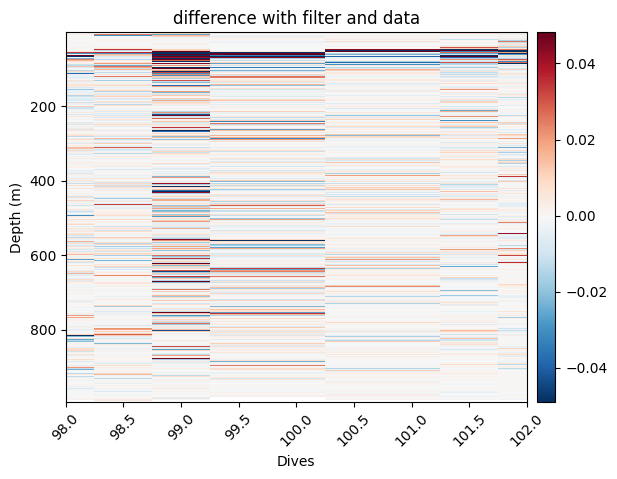

In [61]:
gt.plot(x, y, temp_f - ds_work.conservative_temperature, cmap=cmap)
plt.xlim(98,102)

plt.title('difference with filter and data')

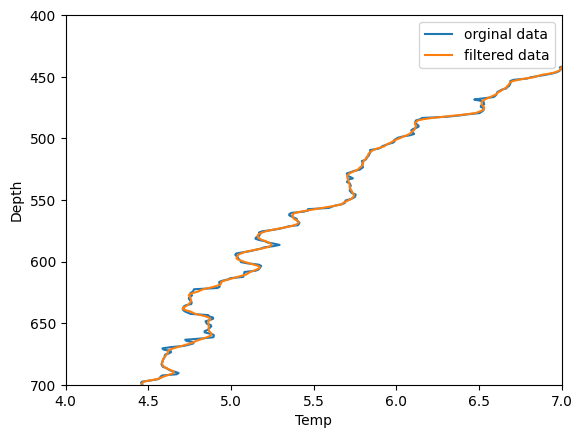

In [62]:
plt.plot(temp.sel(dives=99), temp.ctd_depth, label= 'orginal data')
#plt.ylim(0,80)
#plt.xlim(12,16.5)
#plt.gca().invert_yaxis()
plt.plot(temp_f_g.sel(dives=99), temp_f_g.ctd_depth, label='filtered data')
plt.ylim(400,700)
plt.xlim(4,7)
plt.gca().invert_yaxis()
plt.xlabel('Temp')
plt.ylabel('Depth')
plt.legend()

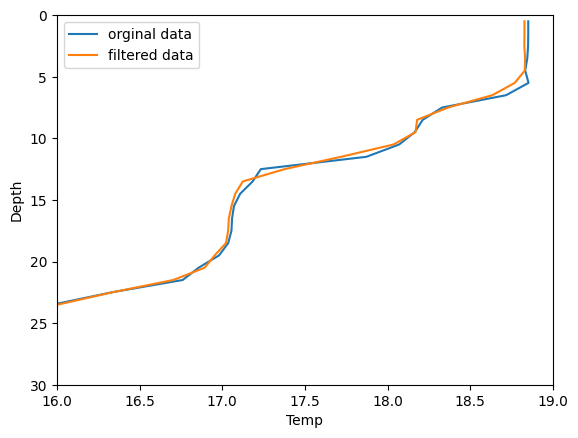

In [63]:
plt.plot(temp.sel(dives=200.5), temp.ctd_depth, label= 'orginal data')
plt.ylim(0,30)
plt.xlim(16,19)
plt.gca().invert_yaxis()
plt.plot(temp_f_g.sel(dives=200.5), temp_f_g.ctd_depth, label='filtered data')
plt.ylim(0,30)
plt.xlim(16,19)
plt.gca().invert_yaxis()
plt.xlabel('Temp')
plt.ylabel('Depth')
plt.legend()

In [ ]:
gt.plot(x, y, ds_work.conservative_temperature)
plt.xlim(98,102)

In [ ]:
ds_work.ctd_time_dt64.values

# calculate back salinity from in-situ temp

In [ ]:


Practical_salinity = gsw.SP_from_C(cond_f*10, temp_i_f, ds_work.ctd_pressure)

absol_sal1 = gsw.SA_from_SP(Practical_salinity,ds_work.ctd_pressure,ds_work.longitude, ds_work.latitude)



In [ ]:
gsw.SP_from_C?


In [ ]:
Practical_salinity_g = gt.grid_data(ds_work.dives, ds_work.ctd_depth, Practical_salinity, bins=depth)

In [ ]:
plt.pcolormesh(Practical_salinity_g.dives, Practical_salinity_g.ctd_depth, Practical_salinity_g)
plt.colorbar()
plt.gca().invert_yaxis()

In [ ]:
in_situ_temp_g = gt.grid_data(ds_work.dives, ds_work.ctd_depth, temp_i_f, bins=depth)

In [ ]:
plt.pcolormesh(in_situ_temp_g.dives, in_situ_temp_g.ctd_depth, in_situ_temp_g)
plt.colorbar()
plt.gca().invert_yaxis()

In [ ]:
absol_sal = gsw.conversions.SA_from_rho(ds_work.density_insitu, temp_f, ds_work.ctd_pressure)

In [ ]:
absol_sal


Physics Variable:
	Removing outliers with IQR * 3: 0 obs
	Removing spikes with rolling median (spike window=5)
	Removing horizontal outliers (fraction=0.2, multiplier=3)
	Smoothing with Savitzky-Golay filter (window=11, order=2)


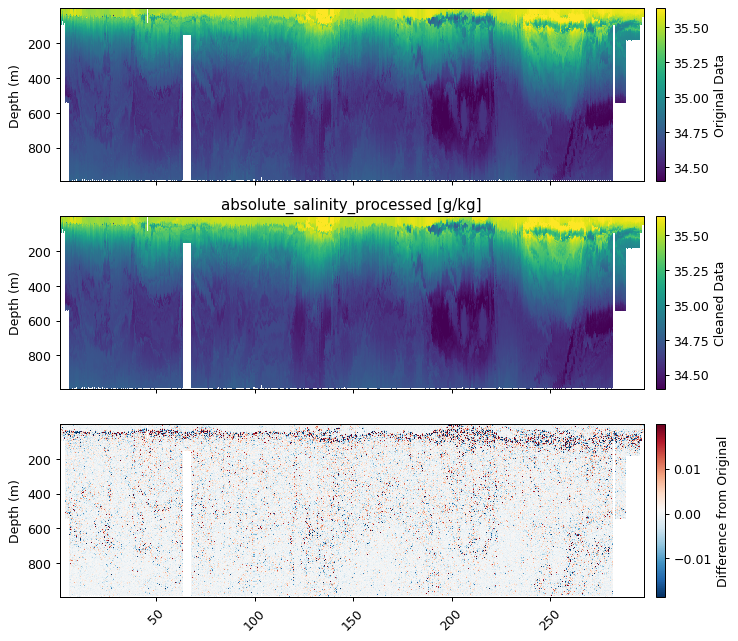

In [64]:
x = np.array(ds_work.dives)  # ensures these are arrays
y = np.array(ds_work.ctd_depth)

sal_f = gt.calc_physics(ds_work.absolute_salinity, x, y, iqr=3,
                            spike_window=5, spike_method='median',
                            mask_frac=0.2, 
                          savitzky_golay_window=11, savitzky_golay_order=2)

#sal_f, salt_spike = gt.cleaning.despike(salt, window_size=3, spike_method='median')
                       


# PLOTTING
fig, ax = plt.subplots(3, 1, figsize=[9, 8.5], sharex=True, dpi=90)
cmap = plt.get_cmap("RdBu_r")
gt.plot(x, y, ds_work.absolute_salinity, ax=ax[0])
gt.plot(x, y, sal_f, ax=ax[1])
#plt.xlim(20,60)
gt.plot(x, y, sal_f - ds_work.absolute_salinity, cmap=cmap, ax=ax[2])
#gt.plot(x, y, salt_spike - salt, cmap=cmap, ax = ax[3])
[a.set_xlabel('') for a in ax]

ax[0].cb.set_label('Original Data')
ax[1].cb.set_label('Cleaned Data')
ax[2].cb.set_label('Difference from Original')

plt.show()

In [65]:

depth = np.arange(0,1000,1)

sal_f_g = gt.grid_data(ds_work.dives, ds_work.ctd_depth, sal_f, bins=depth)

Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


# locate freshwater spikes

In [ ]:
plt.pcolormesh(sal_f_g.dives,sal_f_g.ctd_depth, sal_f_g)
plt.ylim(0,250)
plt.xlim(0,100)
plt.gca().invert_yaxis()
plt.xlabel('Sal')
plt.ylabel('Depth')
plt.grid()
plt.legend()


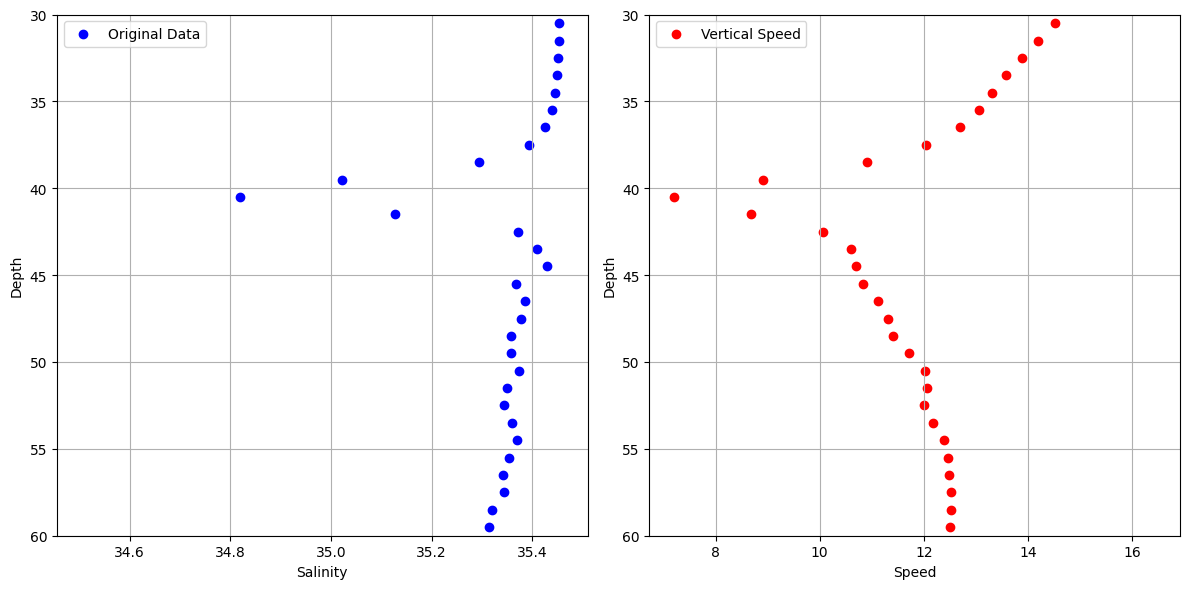

In [152]:
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original salinity data on the first subplot
ax1.scatter(salinity.sel(dives=26.5), salinity.ctd_depth, label='Original Data', color='blue')
ax1.set_ylim(30, 60)  # Set y-axis limits for the original data
ax1.invert_yaxis()  # Invert the y-axis
ax1.set_xlabel('Salinity')
ax1.set_ylabel('Depth')
ax1.grid()
ax1.legend()

# Plot the vertical speed data on the second subplot
ax2.scatter(vert_speed.sel(dives=26.5), vert_speed.ctd_depth, label='Vertical Speed', color='red')
ax2.set_ylim(30, 60)  # Set y-axis limits for the vertical speed data
ax2.invert_yaxis()  # Invert the y-axis
ax2.set_xlabel('Speed')
ax2.set_ylabel('Depth')
ax2.grid()
ax2.legend()

# Show the plot
plt.tight_layout()
plt.show()


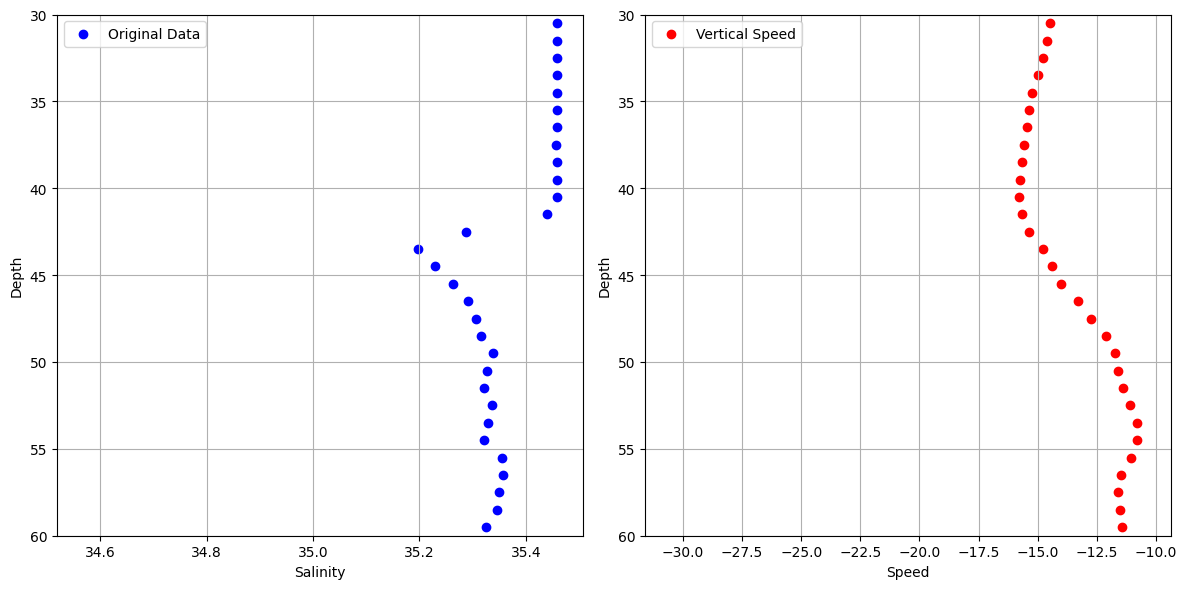

In [89]:
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original salinity data on the first subplot
ax1.scatter(salinity.sel(dives=27), salinity.ctd_depth, label='Original Data', color='blue')
ax1.set_ylim(30, 60)  # Set y-axis limits for the original data
ax1.invert_yaxis()  # Invert the y-axis
ax1.set_xlabel('Salinity')
ax1.set_ylabel('Depth')
ax1.grid()
ax1.legend()

# Plot the vertical speed data on the second subplot
ax2.scatter(vert_speed.sel(dives=27), vert_speed.ctd_depth, label='Vertical Speed', color='red')
ax2.set_ylim(30, 60)  # Set y-axis limits for the vertical speed data
ax2.invert_yaxis()  # Invert the y-axis
ax2.set_xlabel('Speed')
ax2.set_ylabel('Depth')
ax2.grid()
ax2.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original salinity data on the first subplot
ax1.scatter(salinity.sel(dives=28.5), salinity.ctd_depth, label='Original Data', color='blue')
ax1.set_ylim(30, 60)  # Set y-axis limits for the original data
ax1.invert_yaxis()  # Invert the y-axis
ax1.set_xlabel('Salinity')
ax1.set_ylabel('Depth')
ax1.grid()
ax1.legend()

# Plot the vertical speed data on the second subplot
ax2.scatter(vert_speed.sel(dives=28.5), vert_speed.ctd_depth, label='Vertical Speed', color='red')
ax2.set_ylim(30, 60)  # Set y-axis limits for the vertical speed data
ax2.invert_yaxis()  # Invert the y-axis
ax2.set_xlabel('Speed')
ax2.set_ylabel('Depth')
ax2.grid()
ax2.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original salinity data on the first subplot
ax1.scatter(salinity.sel(dives=29.5), salinity.ctd_depth, label='Original Data', color='blue')
ax1.set_ylim(30, 60)  # Set y-axis limits for the original data
ax1.invert_yaxis()  # Invert the y-axis
ax1.set_xlabel('Salinity')
ax1.set_ylabel('Depth')
ax1.grid()
ax1.legend()

# Plot the vertical speed data on the second subplot
ax2.scatter(ds_work.vert_speed.where(ds_work.dives==29.5), ds_work.ctd_depth,label='Vertical Speed', color='red')
ax2.set_ylim(30, 60)  # Set y-axis limits for the vertical speed data
ax2.invert_yaxis()  # Invert the y-axis
ax2.set_xlabel('Speed')
ax2.set_ylabel('Depth')
ax2.grid()
ax2.legend()

# Show the plot
plt.tight_layout()
plt.show()


# using vertical speed to remove fresh water spikes in thermocline 

In [128]:
ds_work = xr.open_dataset('ds_work.nc')

In [129]:
ds_work.absolute_salinity

<xarray.DataArray 'absolute_salinity' (sg_data_point: 1011760)>
[1011760 values with dtype=float64]
Coordinates:
    ctd_time_dt64  (sg_data_point) datetime64[ns] ...
    latitude       (sg_data_point) float64 ...
    ctd_depth      (sg_data_point) float64 ...
    longitude      (sg_data_point) float64 ...
Dimensions without coordinates: sg_data_point
Attributes:
    units:     g/kg
    comment:   Absolute salinity per TEOS-10
    platform:  glider

In [130]:
ds_work.vert_speed

<xarray.DataArray 'vert_speed' (sg_data_point: 1011760)>
[1011760 values with dtype=float64]
Coordinates:
    ctd_time_dt64  (sg_data_point) datetime64[ns] ...
    latitude       (sg_data_point) float64 ...
    ctd_depth      (sg_data_point) float64 ...
    longitude      (sg_data_point) float64 ...
Dimensions without coordinates: sg_data_point
Attributes:
    units:     cm/s
    comment:   Vehicle vertical speed based on hdm
    platform:  glider

(22.0, 23.0)

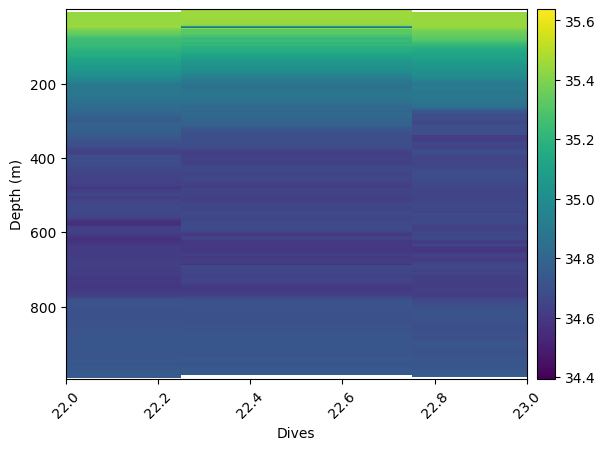

In [160]:
# load in data 
ds_work = xr.open_dataset('ds_work.nc')

def adjust_indices(indices, dives, diff_vert_speed):
    adjusted_indices = []
    prev_dive = None
    for idx, dive, diff in zip(indices, dives, diff_vert_speed):
        # Check if the dive number has changed
        if prev_dive is not None and dive != prev_dive:
            prev_dive = dive
            continue
        # Check if dives are half numbers (0.5, 1.5, 2.5, etc.)
        if dive % 1 == 0.5:
            # Delete the second measurement point when the difference is negative and greater than 1
            if diff < -0.5:
                adjusted_indices.append(idx + 1)
            # Delete the first measurement point when the difference is positive and greater than 1
            elif diff > 0.5:
                adjusted_indices.append(idx)
        else:
            # Delete the second measurement point when the difference is positive and greater than 1
            if diff > 0.5:
                adjusted_indices.append(idx + 1)
            # Delete the first measurement point when the difference is negative and greater than 1
            elif diff < -0.5:
                adjusted_indices.append(idx)
        prev_dive = dive
    return adjusted_indices


# Compute the absolute difference between adjacent points in vert_speed
diff_vert_speed = np.diff(ds_work['vert_speed'])

# Find indices where the absolute difference is greater than 1
diff_indices = np.where(np.abs(diff_vert_speed) > 0.5)

# Find dives corresponding to these indices
dives = ds_work['dives'][diff_indices]

# Adjust the indices based on dive numbers and difference values
adjusted_indices = adjust_indices(diff_indices, dives, diff_vert_speed[diff_indices])

# Calculate the absolute salinity difference before and after adjustments
absolute_salinity_before = ds_work['absolute_salinity'].values
absolute_salinity_after = ds_work['absolute_salinity'].values.copy()
absolute_salinity_after[adjusted_indices] = np.nan
salinity_difference = absolute_salinity_after - absolute_salinity_before

gt.plot(x,y, absolute_salinity_after)
plt.xlim(22,23)

In [ ]:

# grid
salinity_diff = gt.grid_data(ds_work.dives, ds_work.ctd_depth, salinity_difference, bins=depth)



# Plot salinity_diff against ctd_depth and dives using pcolormesh
plt.figure(figsize=(10, 6))
plt.pcolormesh(salinity_diff['dives'], salinity_diff['ctd_depth'], salinity_diff)
plt.colorbar(label='Salinity Difference')
plt.xlabel('Dives')
plt.ylabel('CTD Depth')
plt.title('Salinity Difference against Dives and CTD Depth')
plt.gca().invert_yaxis()
plt.show()

In [67]:
# Find the indices where vert_speed is positive and less than 10 for dive 26.5
positive_speed_indices = (ds_work.vert_speed > 0) & (ds_work.vert_speed < 10) &(ds_work.ctd_depth >= 35) & (ds_work.ctd_depth <= 45) & (ds_work.dives==26.5)

# Select the depth values between 35 and 45 where positive_speed_indices is True
#depth_values = vert_speed.ctd_depth[(vert_speed.ctd_depth >= 35) & (vert_speed.ctd_depth <= 45) & positive_speed_indices]

#depth_values

In [68]:
sal = ds_work['absolute_salinity'].where(~positive_speed_indices, np.nan)

In [69]:
positive_speed_indices = (ds_work.vert_speed > 0) & (ds_work.vert_speed < 13) &(ds_work.ctd_depth >= 40) & (ds_work.ctd_depth <= 55) & (ds_work.dives==22.5)

In [70]:
sal = sal.where(~positive_speed_indices, np.nan)

In [71]:
positive_speed_indices = (ds_work.vert_speed > 0) & (ds_work.vert_speed < 11) &(ds_work.ctd_depth >= 35) & (ds_work.ctd_depth <= 50) & (ds_work.dives==28.5)

In [72]:
sal = sal.where(~positive_speed_indices, np.nan)


Physics Variable:
	Removing outliers with IQR * 3: 0 obs
	Removing spikes with rolling median (spike window=5)
	Removing horizontal outliers (fraction=0.2, multiplier=3)
	Smoothing with Savitzky-Golay filter (window=11, order=2)


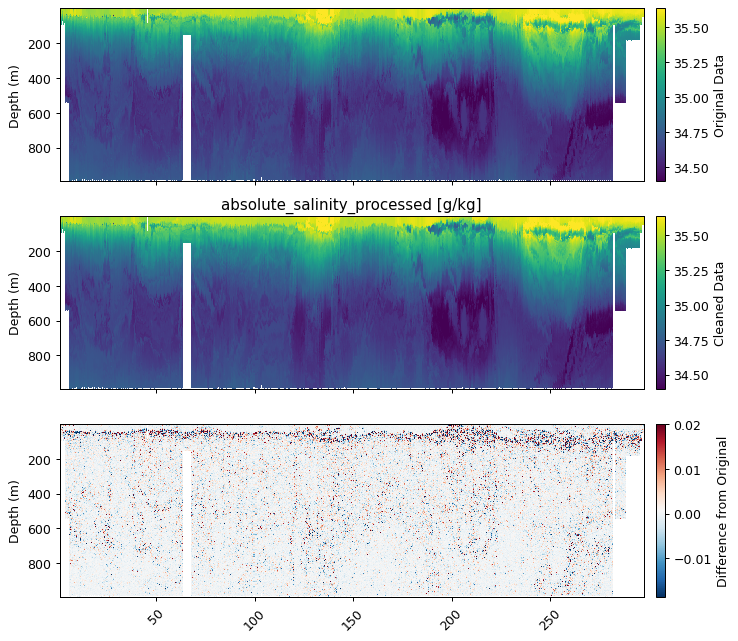

In [112]:
x = np.array(ds_work.dives)  # ensures these are arrays
y = np.array(ds_work.ctd_depth)

sal_f = gt.calc_physics(ds_work.absolute_salinity, x, y, iqr=3,
                            spike_window=5, spike_method='median',
                            mask_frac=0.2, 
                          savitzky_golay_window=11, savitzky_golay_order=2)

#sal_f, salt_spike = gt.cleaning.despike(salt, window_size=3, spike_method='median')
                       


# PLOTTING
fig, ax = plt.subplots(3, 1, figsize=[9, 8.5], sharex=True, dpi=90)
cmap = plt.get_cmap("RdBu_r")
gt.plot(x, y, ds_work.absolute_salinity, ax=ax[0])
plt.xlim(26,27)
gt.plot(x, y, sal_f, ax=ax[1])
plt.xlim(26,27)
gt.plot(x, y, sal_f - ds_work.absolute_salinity, cmap=cmap, ax=ax[2])
#gt.plot(x, y, salt_spike - salt, cmap=cmap, ax = ax[3])
[a.set_xlabel('') for a in ax]

ax[0].cb.set_label('Original Data')
#plt.xlim(20,30)
ax[1].cb.set_label('Cleaned Data')
#plt.xlim(20,30)
ax[2].cb.set_label('Difference from Original')
#plt.xlim(20,30)

plt.show()

In [92]:

depth = np.arange(0,1000,1)

sal_f_g = gt.grid_data(ds_work.dives, ds_work.ctd_depth, sal_f, bins=depth)

Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


# checks for salinity spikes

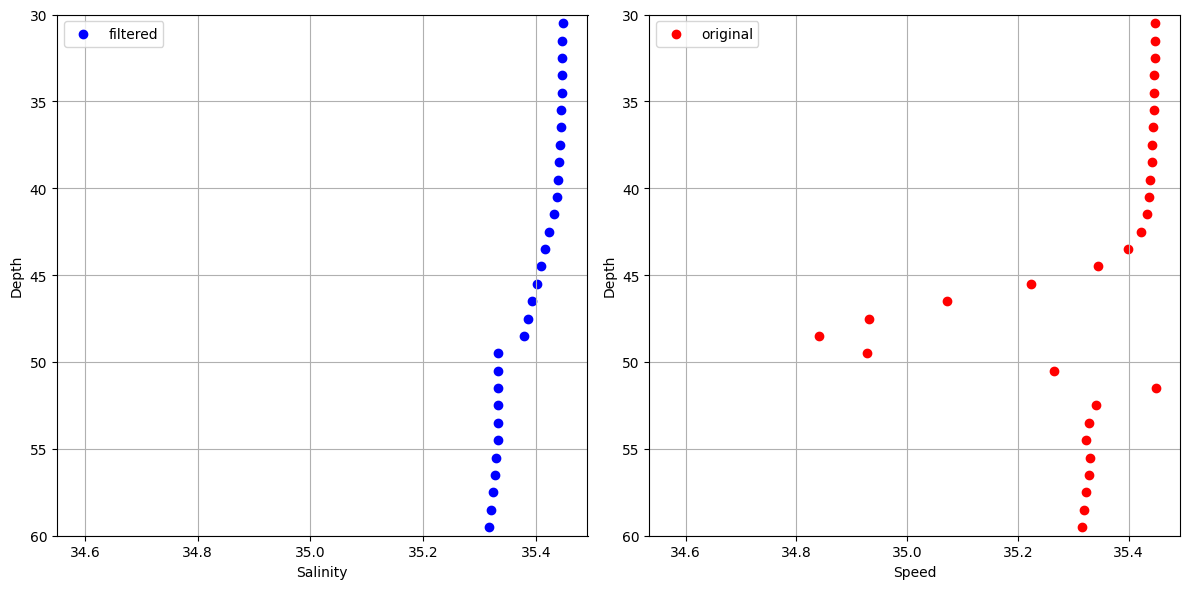

In [95]:
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original salinity data on the first subplot
ax1.scatter(sal_f_g.sel(dives=22.5), sal_f_g.ctd_depth, label='filtered', color='blue')
ax1.set_ylim(30, 60)  # Set y-axis limits for the original data
ax1.invert_yaxis()  # Invert the y-axis
ax1.set_xlabel('Salinity')
ax1.set_ylabel('Depth')
ax1.grid()
ax1.legend()

#
ax2.scatter(salinity.sel(dives=22.5), salinity.ctd_depth, label='original', color='red')
ax2.set_ylim(30, 60)  
ax2.invert_yaxis()  # Invert the y-axis
ax2.set_xlabel('Speed')
ax2.set_ylabel('Depth')
ax2.grid()
ax2.legend()

# Show the plot
plt.tight_layout()
plt.show()

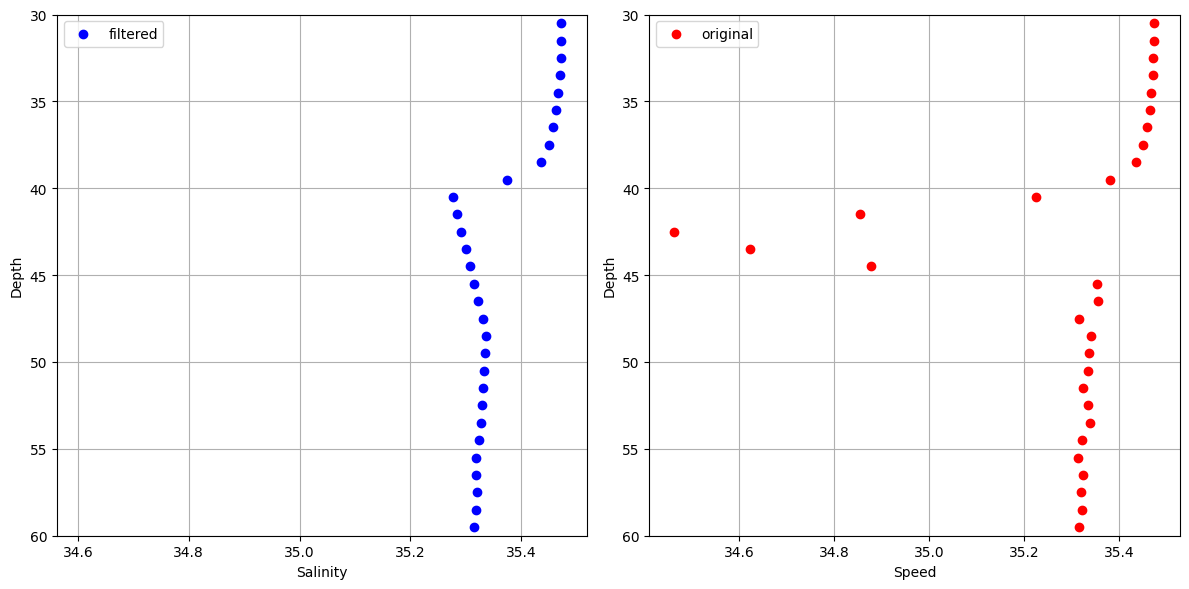

In [94]:
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original salinity data on the first subplot
ax1.scatter(sal_f_g.sel(dives=28.5), sal_f_g.ctd_depth, label='filtered', color='blue')
ax1.set_ylim(30, 60)  # Set y-axis limits for the original data
ax1.invert_yaxis()  # Invert the y-axis
ax1.set_xlabel('Salinity')
ax1.set_ylabel('Depth')
ax1.grid()
ax1.legend()

#
ax2.scatter(salinity.sel(dives=28.5), salinity.ctd_depth, label='original', color='red')
ax2.set_ylim(30, 60)  
ax2.invert_yaxis()  # Invert the y-axis
ax2.set_xlabel('Speed')
ax2.set_ylabel('Depth')
ax2.grid()
ax2.legend()

# Show the plot
plt.tight_layout()
plt.show()

# ox my filter


Physics Variable:
	Removing outliers with IQR * 2.5: 8 obs
	Removing spikes with rolling median (spike window=5)
	Removing horizontal outliers (fraction=0.2, multiplier=2.5)
	Smoothing with Savitzky-Golay filter (window=11, order=2)


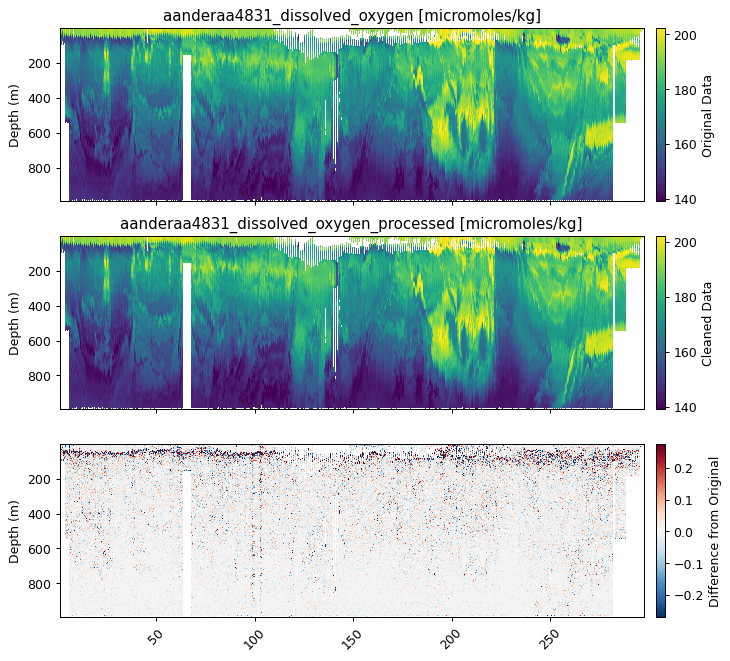

In [75]:
x = np.array(ds_work.dives)  # ensures these are arrays
y = np.array(ds_work.ctd_depth)

ox_f = gt.calc_physics(ds_work.aanderaa4831_dissolved_oxygen, x, y, iqr=2.5,
                            spike_window=5, spike_method='median',
                            mask_frac=0.2, 
                          savitzky_golay_window=11, savitzky_golay_order=2)
                       


# PLOTTING
fig, ax = plt.subplots(3, 1, figsize=[9, 8.5], sharex=True, dpi=90)
cmap = plt.get_cmap("RdBu_r")
gt.plot(x, y, ds_work.aanderaa4831_dissolved_oxygen, ax=ax[0])
gt.plot(x, y, ox_f, ax=ax[1])
gt.plot(x, y, ox_f - ds_work.aanderaa4831_dissolved_oxygen, cmap=cmap, ax=ax[2])

[a.set_xlabel('') for a in ax]

ax[0].cb.set_label('Original Data')
ax[1].cb.set_label('Cleaned Data')
ax[2].cb.set_label('Difference from Original')

plt.show()

(98.0, 100.0)

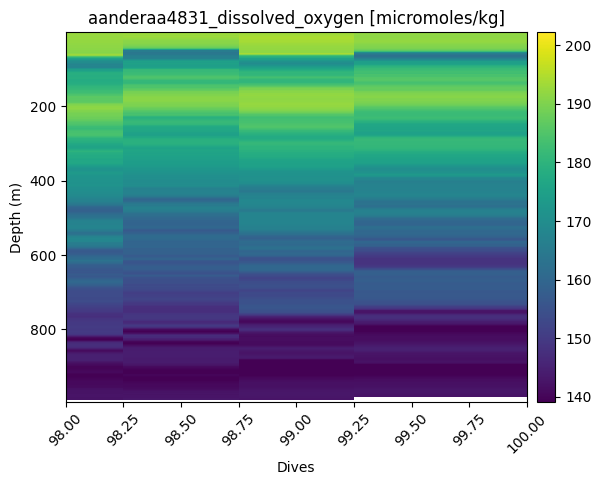

In [76]:
gt.plot(x, y, ds_work.aanderaa4831_dissolved_oxygen)
plt.xlim(98,100)

Text(0.5, 1.0, 'difference with filter and data')

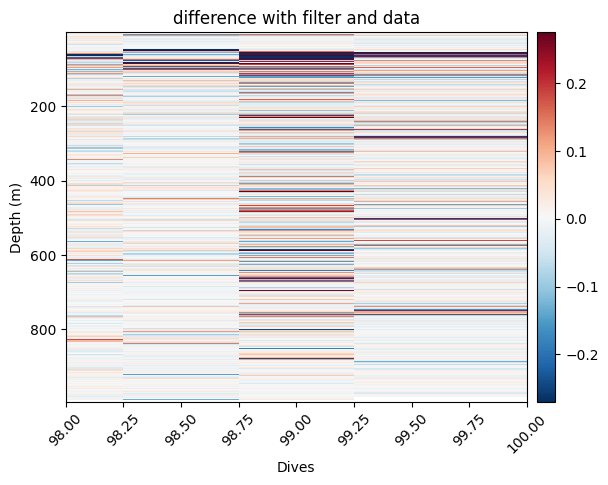

In [77]:
gt.plot(x, y, ox_f - ds_work.aanderaa4831_dissolved_oxygen, cmap=cmap)
plt.xlim(98,100)

plt.title('difference with filter and data')

In [78]:
ox_f_g = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ox_f, bins=depth)

Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


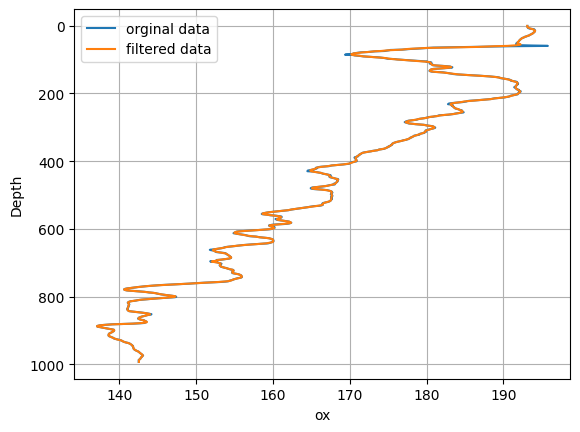

In [79]:
plt.plot(o2.sel(dives=99), o2.ctd_depth, label= 'orginal data')
#plt.ylim(0,80)
#plt.xlim(12,16.5)
#plt.gca().invert_yaxis()
plt.plot(ox_f_g.sel(dives=99), ox_f_g.ctd_depth, label='filtered data')
#plt.ylim(400,700)
#plt.xlim(4,7)
plt.gca().invert_yaxis()
plt.xlabel('ox')
plt.ylabel('Depth')
plt.grid()
plt.legend()

# create a new dataset with filtered cleaned data

In [80]:
# creating new dataset

# Extract the data from the DataArray objects
temp_data = temp_f.values
salinity_data = sal_f.values
o2_data = ox_f.values
ctd_pressure_data= ds_work.ctd_pressure.values
optode_temp_data = ds_work.eng_aa4831_Temp.values
#latitude_data = ds_work.latitude.values
#longitude_data = ds_work.longitude.values


# Get the dimension names for temp, salinity, and o2
temp_dims = temp_f.dims
salinity_dims = sal_f.dims
o2_dims = ox_f.dims
ctd_pressure_dims = ds_work.ctd_pressure.dims
optode_temp_dims = ds_work.eng_aa4831_Temp.dims
#latitude_dims = ds_work.latitude_gsm.dims
#longitude_dims = ds_work.longitude_gsm.dims


# Create the Dataset
ds = xr.Dataset(
    data_vars=dict(
        temp=(temp_dims, temp_data),
        salinity=(salinity_dims, salinity_data),
        o2=(o2_dims, o2_data),
        pressure=(ctd_pressure_dims, ctd_pressure_data),
        optode_temp = (optode_temp_dims, optode_temp_data),
        #latitude = (latitude_dims, latitude_data),
        #longitude  = (longitude_dims, longitude_data),
        
    ),
    coords=dict(
        dives=ds_work.dives,
        ctd_depth=ds_work.ctd_depth,
        longitude=ds_work.longitude,
        latitude=ds_work.latitude,
    ),
    attrs=dict(description="dataset including gridded data and cleaned variables"),
)

# Print the dataset
print(ds)

<xarray.Dataset>
Dimensions:        (sg_data_point: 1011760)
Coordinates:
    ctd_time_dt64  (sg_data_point) datetime64[ns] 2023-03-22T08:33:43 ... 202...
    latitude       (sg_data_point) float64 -37.52 -37.52 ... -34.18 -34.18
    ctd_depth      (sg_data_point) float64 0.3871 0.8966 ... 0.01038 -0.1323
    longitude      (sg_data_point) float64 17.32 17.32 17.32 ... 16.82 16.82
    dives          (sg_data_point) float64 1.0 1.0 1.0 1.0 ... 297.5 297.5 297.5
Dimensions without coordinates: sg_data_point
Data variables:
    temp           (sg_data_point) float64 nan nan nan nan ... 18.3 nan nan nan
    salinity       (sg_data_point) float64 nan nan nan nan ... 35.6 nan nan nan
    o2             (sg_data_point) float64 nan nan nan nan ... nan nan nan nan
    pressure       (sg_data_point) float64 0.3903 0.9036 ... 0.01053 -0.1332
    optode_temp    (sg_data_point) float64 101.5 19.73 19.73 ... 100.4 100.4
Attributes:
    description:  dataset including gridded data and cleaned variabl

In [81]:
ds.to_netcdf('ds_clean.nc')

# some checks


In [ ]:
# Create the figure and axes objects
fig, ax = figsize=(12, 6)
# Plot dissolved oxygen values between 30 and 105
gt.plot(x, y, ds_work.aanderaa4831_dissolved_oxygen)

plt.xlim(100, 250)  # Set y-axis limit to 0-50 and invert y-axis


In [ ]:
# Create the figure and axes objects
fig, ax = figsize=(12, 6)
# Plot dissolved oxygen values between 30 and 105
gt.plot(x, y, ox_qc)

plt.xlim(120, 150)  # Set y-axis limit to 0-50 and invert y-axis


In [ ]:
x = np.array(ds_work.dives)  # ensures these are arrays
y = np.array(ds_work.ctd_depth)



o2_savgol = gt.cleaning.savitzky_golay(ds_work.aanderaa4831_dissolved_oxygen, window_size=9, order=2)

# PLOTTING
fig, ax = plt.subplots(3, 1, figsize=[9, 8.5], sharex=True, dpi=90)
cmap = plt.get_cmap("RdBu_r")
gt.plot(x, y, ds_work.aanderaa4831_dissolved_oxygen, ax=ax[0])
gt.plot(x, y, o2_savgol, ax=ax[1])
gt.plot(x, y, o2_savgol - ds_work.aanderaa4831_dissolved_oxygen, cmap=cmap, ax=ax[2])

[a.set_xlabel('') for a in ax]

ax[0].cb.set_label('Original Data')
ax[1].cb.set_label('Cleaned Data')
ax[2].cb.set_label('Difference from Original')

plt.show()


In [ ]:
ds